In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [2]:
df = pd.read_csv('./data/RustSurvey+EarthEngine.csv')

/Users/arokem/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (11,20,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
df.shape

(8304, 886)

In [33]:
list(df.columns)

['Location.ID',
 'HostGenusID',
 'HostGenusNameScientific',
 'HostSpeciesID',
 'HostSpeciesNameScientific',
 'HostCultivarName',
 'UserInit',
 'ObsYear',
 'ObsDate',
 'SurveySiteID',
 'SurveySiteName',
 'SurveyorName',
 'InstitutionName',
 'LocationName',
 'Latitude',
 'Longitude',
 'Altitude',
 'FieldArea',
 'GrowthStageID',
 'GrowthStageName',
 'Comment',
 'StemRust.Severity',
 'StemRust.SeverityName',
 'StemRust.Incidence',
 'StemRust.IncidenceName',
 'StemRust.InfectionType',
 'StemRust.InfectionTypeName',
 'LeafRust.Severity',
 'LeafRust.SeverityName',
 'LeafRust.Incidence',
 'LeafRust.IncidenceName',
 'LeafRust.InfectionType',
 'LeafRust.InfectionTypeName',
 'YellowRust.Severity',
 'YellowRust.SeverityName',
 'YellowRust.Incidence',
 'YellowRust.IncidenceName',
 'YellowRust.InfectionType',
 'YellowRust.InfectionTypeName',
 'StemRust.Binary',
 'YellowRust.Binary',
 'NoRust.Binary',
 'GLCF_GLS_TCC_source_index',
 'GLCF_GLS_TCC_tree_canopy_cover',
 'GLCF_GLS_TCC_uncertainty',
 'LAND

In [77]:
df['StemRust.Severity']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      1.0
16      0.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      0.0
23      0.0
24      1.0
25      1.0
26      0.0
27      1.0
28      1.0
29      1.0
       ... 
8274    3.0
8275    1.0
8276    2.0
8277    1.0
8278    1.0
8279    3.0
8280    2.0
8281    2.0
8282    0.0
8283    0.0
8284    1.0
8285    1.0
8286    1.0
8287    1.0
8288    1.0
8289    1.0
8290    2.0
8291    0.0
8292    1.0
8293    1.0
8294    1.0
8295    1.0
8296    2.0
8297    2.0
8298    2.0
8299    2.0
8300    1.0
8301    1.0
8302    1.0
8303    2.0
Name: StemRust.Severity, dtype: float64

In [35]:
df['ObsYear'].unique()

array([2012, 2013, 2014, 2007, 2008, 2009, 2010, 2011, 2015, 2016])

In [36]:
list(year_df['Latitude'])[0]

9.0178799999999999

In [51]:
#folium.CircleMarker()
map1 = folium.Map(location=[df['Latitude'][0], df['Longitude'][0]], zoom_start=6)

# Using Tableau ten hex from: https://community.tableau.com/message/200964
year_colors = {2007:'#1F77B4', 
               2008:'#FF7F0E', 
               2009:'#2CA02C', 
               2010:'#D62728', 
               2011:'#9467BD',
               2012:'#8C564B',
               2013:'#CFECF9', 
               2014:'#7F7F7F',
               2015:'#BCBD22', 
               2016:'#17BECF'}

In [99]:
severity_colors = {0:'#4EE500' , 1:'#879F05', 2:'#C05A0A', 3:'#F91510', np.nan:'#FFFFFF'}

In [109]:
for year, year_df in df.groupby('ObsYear'):
    year_map = folium.Map(location=[year_df['Latitude'].iloc[0], year_df['Longitude'].iloc[0]], zoom_start=6)
    for idx in range(year_df.shape[0]):
        lon = year_df['Latitude'].iloc[idx]
        lat = year_df['Longitude'].iloc[idx]
        if np.isnan(year_df['StemRust.Severity'].iloc[idx]):
            c = 'FFFFFF'
        else:
            c = severity_colors[year_df['StemRust.Severity'].iloc[idx]]

        marker = folium.CircleMarker([lon, lat], 
                                     color=c,
                                     fill_color=c,
                                     radius=1000)
        marker.add_to(year_map)

    year_map.save('ethiopia%s.html' % year)

In [110]:
c

'#C05A0A'

In [111]:
year_map

In [ ]:
## HEATMAPS?
# from geopandas import GeoDataFrame
# import shapely
# gdf = GeoDataFrame(df[['Unique_Key','Latitude','Longitude']].groupby('Unique_Key').max())
# gdf['latlon']=zip(gdf['Latitude'],gdf['Longitude'])
# gdf['geometry']=gdf[['latlon']].applymap(lambda x:shapely.geometry.Point(x))
# import folium
# from folium import plugins
# grad={0: 'yellow', 0.5: 'orange', .8: 'red',0.9:'#b30000 ',1:'#800000 '}
# stops_heatmap = folium.Map(location=[40.6, -73.8], zoom_start=10)
# stops_heatmap.add_children(plugins.HeatMap(gdf.latlon, min_opacity=0.2, gradient=grad, radius=10, blur=10))
# ## stops_heatmap.save("heatmap.html")
# stops_heatmap

# folium.TileLayer('mapquestopen').add_to(mapa)
# folium.TileLayer('stamentoner').add_to(mapa)
# folium.LayerControl().add_to(mapa)

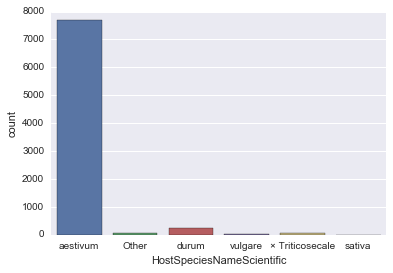

In [112]:
sns.countplot(data=df, x='HostSpeciesNameScientific')